In [5]:
!pip install tensorflow-gpu==2.0.rc

     |████████████████████████████████| 380.5MB 45kB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 501kB 58.1MB/s 
     |████████████████████████████████| 4.3MB 54.6MB/s 


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt 
from glob import glob
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob
import matplotlib.pyplot as plt

In [7]:
cd /content/drive/MyDrive/ML/Bootcamp/Assignment8

/content/drive/MyDrive/ML/Bootcamp/Assignment8


In [8]:
train_path = "/content/drive/MyDrive/ML/Bootcamp/Assignment8/fruits-360/Training/"
test_path = "/content/drive/MyDrive/ML/Bootcamp/Assignment8/fruits-360/Test/"
img = load_img("/content/drive/MyDrive/ML/Bootcamp/Assignment8/fruits-360/Training/Watermelon/r_310_100.jpg")
# img = load_img(train_path + "Apple Braeburn/0_100.jpg")
# plt.imshow(img)
# plt.axis("off")
# plt.show()

In [9]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [10]:
width = 100
heigh = 100
size = 100
className = glob(train_path + "/*")
numberOfClass = len(className)
print("NumberOfClass: ", numberOfClass)

NumberOfClass:  131


#Method 1

##CNN

In [11]:
#CNN Model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) #output
model.add(Activation("softmax"))
model.summary()

NameError: ignored

In [ ]:
aug = ImageDataGenerator(rescale=1./255,shear_range=0.3,zoom_range=0.3,rotation_range=0.18,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
batch_size = 32
learning_rate = 0.01

In [ ]:
opt = SGD(learning_rate=learning_rate,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

##Train

In [ ]:
train_generator = aug.flow_from_directory(train_path, 
                                                    target_size = (100,100),
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")

                                                    
test_generator = aug.flow_from_directory(test_path, 
                                                    target_size = (100,100),
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")

#Model Training
hist = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 32,
                    epochs = 100,
                    shuffle=True,
                    verbose=1,
                    validation_data = test_generator,
                    validation_steps = 20)

Found 67693 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
32/32 [==============================] - 462s 14s/step - loss: 4.8728 - accuracy: 0.0088 - val_loss: 4.8734 - val_accuracy: 0.0047
Epoch 2/100
32/32 [==============================] - 178s 6s/step - loss: 4.8568 - accuracy: 0.0146 - val_loss: 4.8576 - val_accuracy: 0.0109
Epoch 3/100
32/32 [==============================] - 266s 8s/step - loss: 4.8696 - accuracy: 0.0156 - val_loss: 4.8641 - val_accuracy: 0.0109
Epoch 4/100
32/32 [==============================] - 253s 8s/step - loss: 4.8556 - accuracy: 0.0176 - val_loss: 4.8259 - val_accuracy: 0.0125
Epoch 5/100
32/32 [==============================] - 252s 8s/step - loss: 4.7623 - accuracy: 0.0176 - val_loss: 4.6390 - val_accuracy: 0.0172
Epoch 6/100
32/32 [==============================] - 260s 8s/step - loss: 4.5710 - accuracy: 0.0254 - val

##Score

In [ ]:
score = model.evaluate(test_generator)  
#score = model.evaluate(x_test, y_test, verbose=1)
print(score)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

22688/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

##Result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


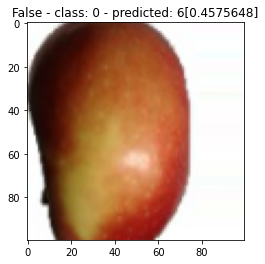

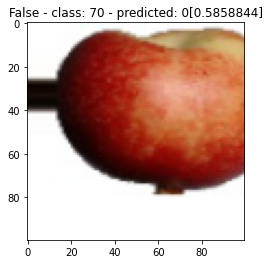

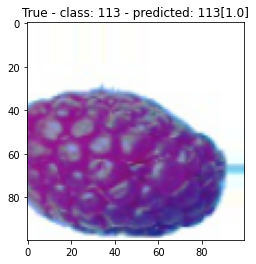

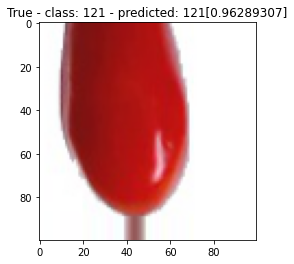

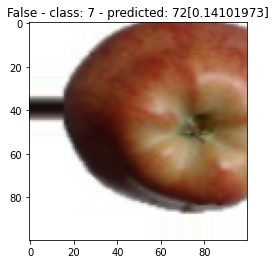

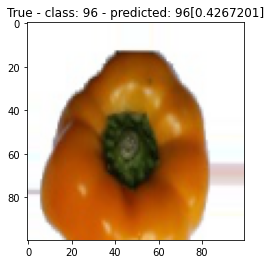

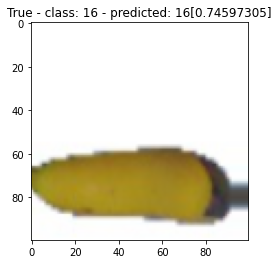

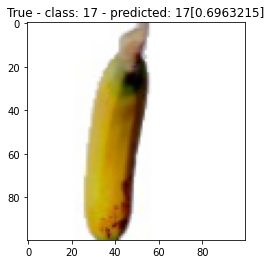

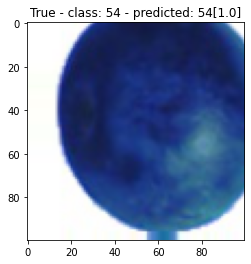

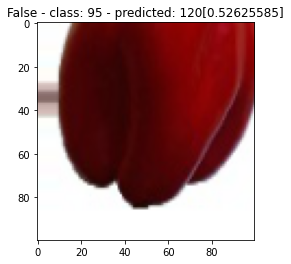

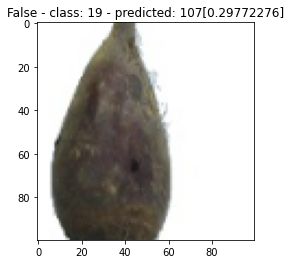

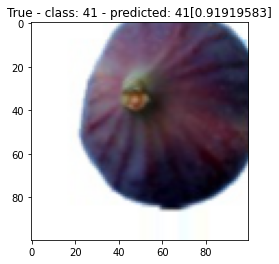

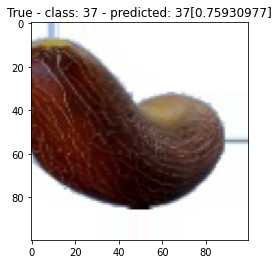

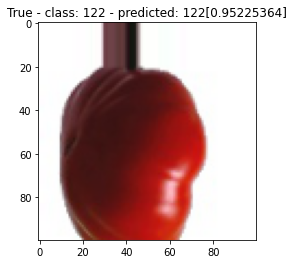

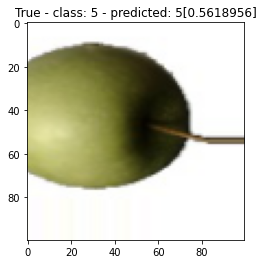

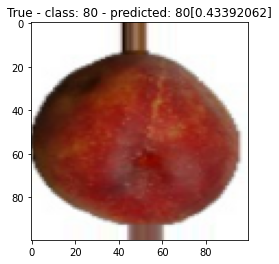

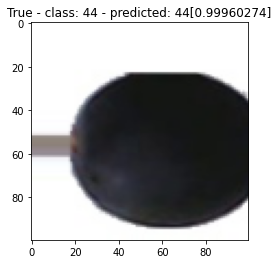

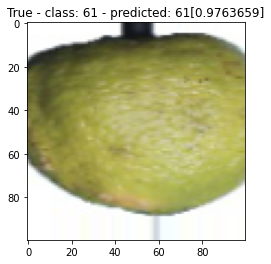

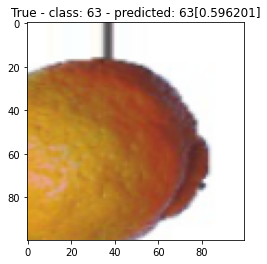

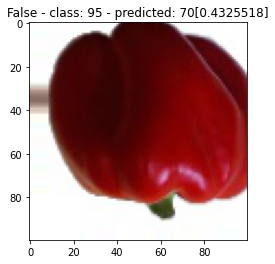

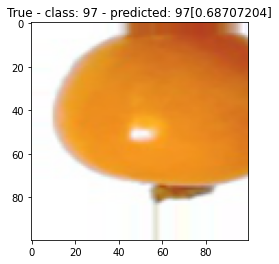

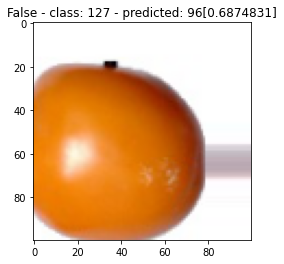

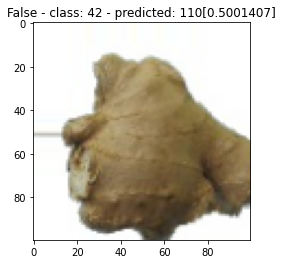

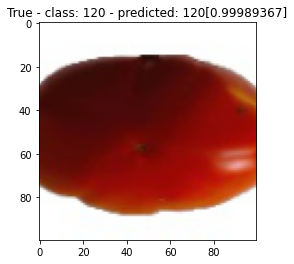

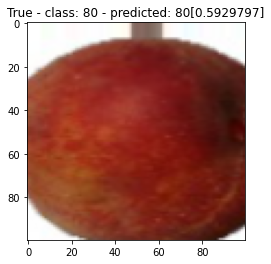

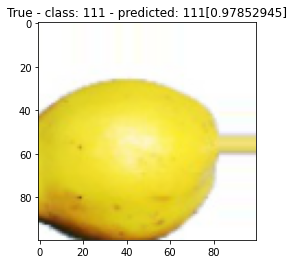

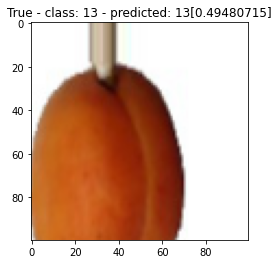

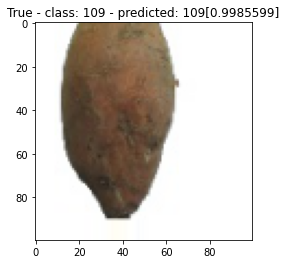

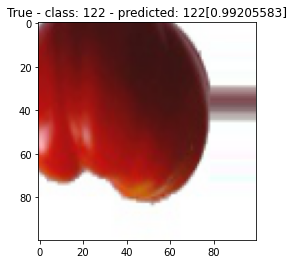

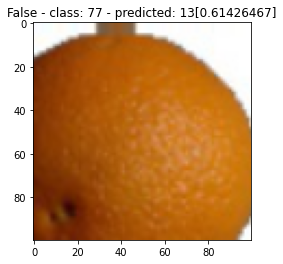

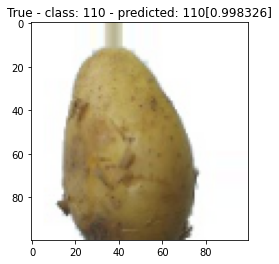

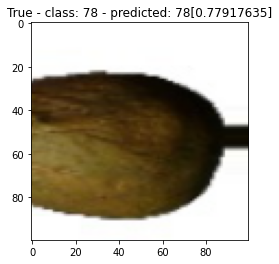

In [ ]:
import numpy as np
def predict_one(model):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = str(the_pred)
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = str(np.argmax(classes_batch[k]))
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)
predict_one(model)  

#Method

#CNN

In [11]:
#CNN Model
model1 = Sequential()
model1.add(Conv2D(32,(3,3),input_shape = x.shape))
model1.add(Activation("relu"))
model1.add(MaxPooling2D())

model1.add(Conv2D(32,(3,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D())

model1.add(Conv2D(32,(3,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D())

model1.add(Flatten())
model1.add(Dense(1024))
model1.add(Activation("relu"))
model1.add(Dropout(0.5))
model1.add(Dense(numberOfClass)) #output
model1.add(Activation("softmax"))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9

In [12]:
aug = ImageDataGenerator(rescale=1./255,shear_range=0.3,zoom_range=0.3,rotation_range=0.18,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True)
batch_size = 32
learning_rate = 0.01

In [13]:
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

##Train

In [14]:
train_generator1 = aug.flow_from_directory(train_path, 
                                                    target_size = (100,100),
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")

                                                    
test_generator1 = aug.flow_from_directory(test_path, 
                                                    target_size = (100,100),
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")

#Model Training
hist = model1.fit_generator(generator = train_generator1,
                    steps_per_epoch = 32,
                    epochs = 100,
                    shuffle=True,
                    verbose=1,
                    validation_data = test_generator1,
                    validation_steps = 20)

Found 67693 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
32/32 [==============================] - 594s 19s/step - loss: 4.8597 - accuracy: 0.0096 - val_loss: 4.4659 - val_accuracy: 0.0516
Epoch 2/100
32/32 [==============================] - 613s 19s/step - loss: 4.3928 - accuracy: 0.0413 - val_loss: 4.0005 - val_accuracy: 0.0562
Epoch 3/100
32/32 [==============================] - 574s 18s/step - loss: 4.0130 - accuracy: 0.0751 - val_loss: 3.6677 - val_accuracy: 0.0953
Epoch 4/100
32/32 [==============================] - 563s 18s/step - loss: 3.7655 - accuracy: 0.0809 - val_loss: 3.4024 - val_accuracy: 0.1203
Epoch 5/100
32/32 [==============================] - 545s 17s/step - loss: 3.5527 - accuracy: 0.0978 - val_loss: 3.2886 - val_accuracy: 0.1484
Epoch 6/100
32/32 [==============================] - 524s 17s/step - loss: 3.3476 - accuracy: 0.1300 - val_loss: 3.0313 - val_accuracy: 0.1578
Epoch 7/100
32/32 [==============================] - 523s 17s/step - loss: 3.1405 - accuracy: 0.1446 - val_loss: 2.7040 - val_accuracy: 0.2234

In [15]:
model1.save_weights("model1.h5")

In [16]:
score = model1.evaluate(test_generator1)  
#score = model.evaluate(x_test, y_test, verbose=1)
print(score)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

709/709 [==============================] - 568s 802ms/step - loss: 0.9454 - accuracy: 0.7471
[0.9454273581504822, 0.7471350431442261]
Test loss: 0.9454273581504822
Test accuracy: 0.7471350431442261


##Result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


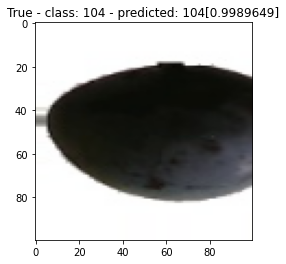

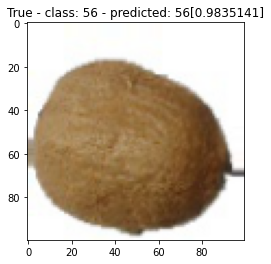

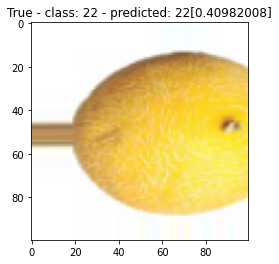

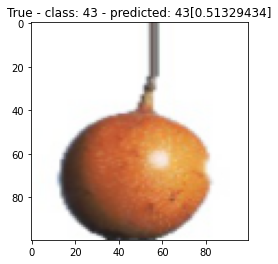

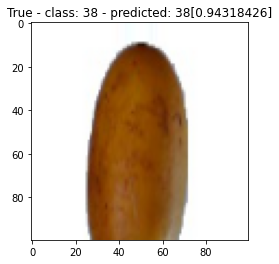

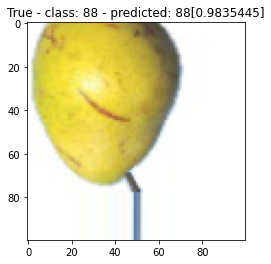

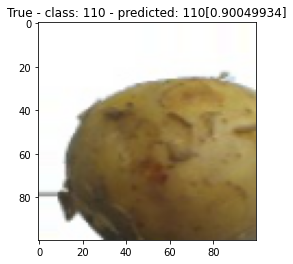

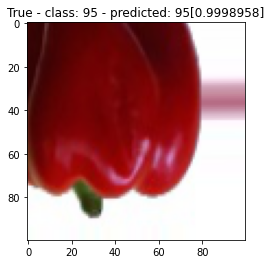

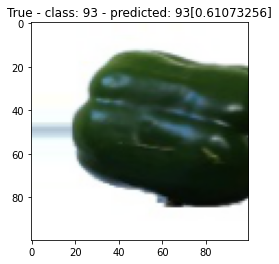

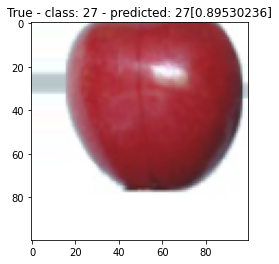

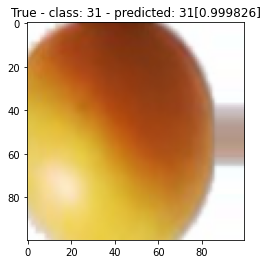

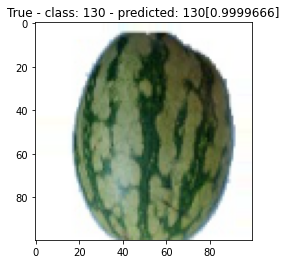

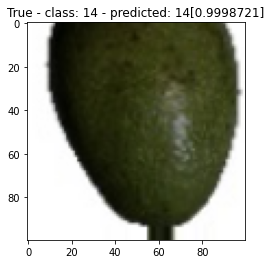

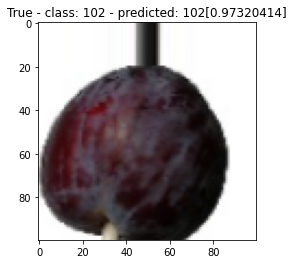

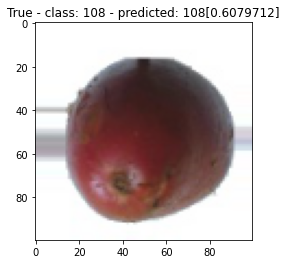

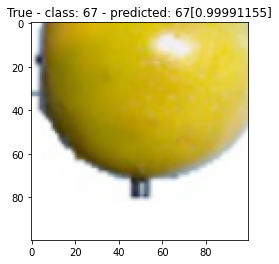

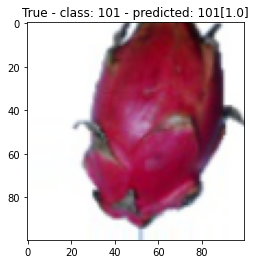

In [ ]:
import numpy as np
def predict_one(model1):  
    image_batch1, classes_batch1 = next(test_generator1)
    predicted_batch1 = model1.predict(image_batch1)
    for k in range(0,image_batch1.shape[0]):
      image = image_batch1[k]
      pred = predicted_batch1[k]
      the_pred = np.argmax(pred)
      predicted = str(the_pred)
      val_pred = max(pred)
      the_class = np.argmax(classes_batch1[k])
      value = str(np.argmax(classes_batch1[k]))
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)
predict_one(model1)  